# Support Vector Machines (Support Vector Classifier) method for wine type prediction.

**Import wine dataset from scikit learn dataset and other libraries needed.**

In [21]:
from sklearn.datasets import load_wine

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
win = load_wine()

**What the dataset contains of.**

In [23]:
win

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [300]:
print(win['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

**Show the target data. There are 3 classes of wine (0, 1, and 2).**

In [24]:
win['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

**Create a new dataframe of the wine data, and using its feature names as the column names.**

In [313]:
win_df = pd.DataFrame(win['data'], columns=win['feature_names'])

In [314]:
win_df

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

**Dataset information shows that it contains none of null values. This heatmap below is just to double-check.**

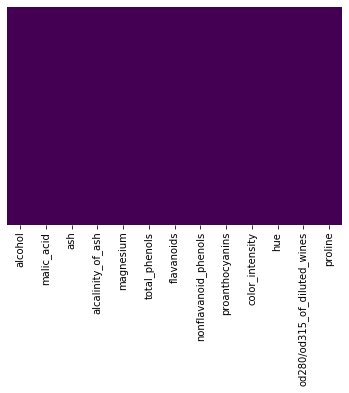

In [315]:
sns.heatmap(win_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

**Create a pairplot to see the relationship of one column (feature) to another as to explor the dataset. It is also used to show how the distribution of the data is in the dataset.**

In [ ]:
win_data = win_df

In [306]:
win_data['target']=pd.DataFrame(win['target'])

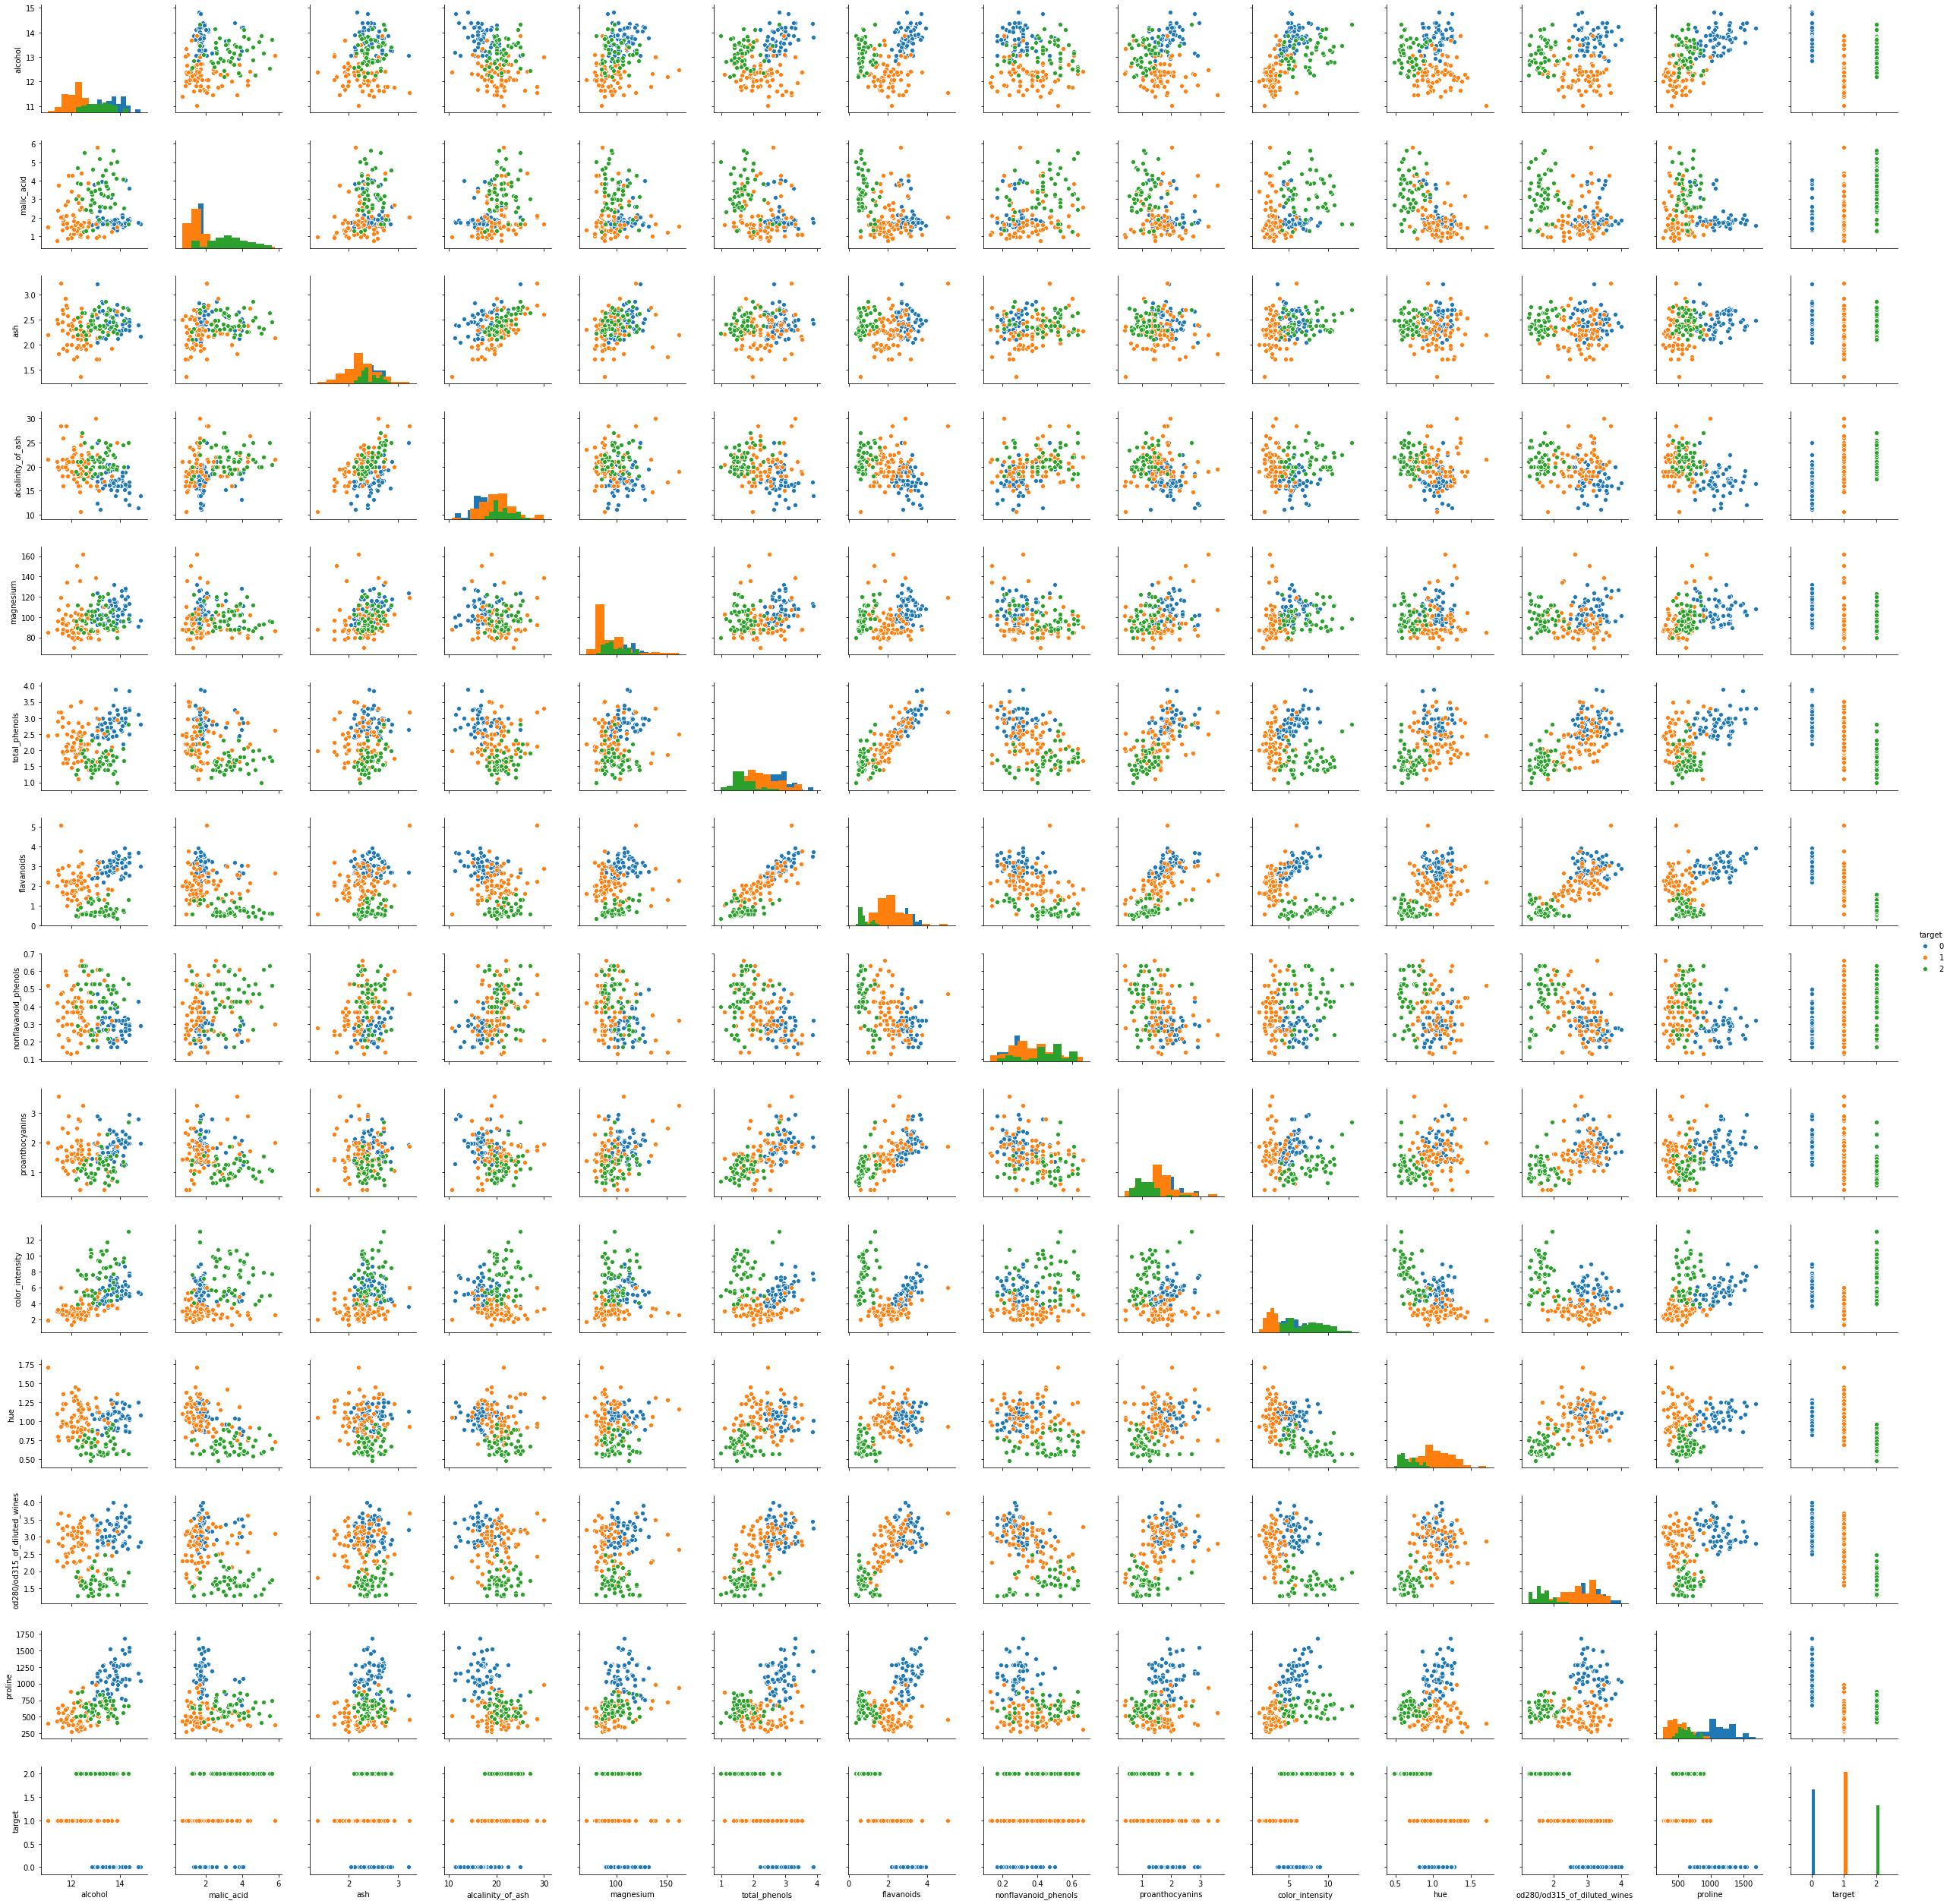

In [309]:
sns.pairplot(win_data, hue='target', diag_kind='hist')

**Creating pairplot of a large dataset is not recommended actually, but sometimes is necessary (since it takes quite big memory and processing power to perform). For this one as the plot shows that most of the data are not in gaussian distribution manner, then it is better to normalize the data first before splitting the data and so on. And it is also because the big range between features of the dataset, so feature scaling is necessary in order to create a good model, since SVM method is a gradient descent machine learning method.**

In [262]:
from sklearn.preprocessing import MinMaxScaler

In [263]:
minmax = MinMaxScaler()

In [264]:
win_df = minmax.fit_transform(win_df)

**MinMaxScaler().transform() will change the dataframe into an array. This code below converts it back to a dataframe.**

In [265]:
wine_df = pd.DataFrame(win_df, columns=win['feature_names'])

**This is the final and normalized dataset. The data ranges between 0 and 1 after normalized.**

In [266]:
wine_df

alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0    0.842105    0.191700  0.572193           0.257732   0.619565   
1    0.571053    0.205534  0.417112           0.030928   0.326087   
2    0.560526    0.320158  0.700535           0.412371   0.336957   
3    0.878947    0.239130  0.609626           0.319588   0.467391   
4    0.581579    0.365613  0.807487           0.536082   0.521739   
..        ...         ...       ...                ...        ...   
173  0.705263    0.970356  0.582888           0.510309   0.271739   
174  0.623684    0.626482  0.598930           0.639175   0.347826   
175  0.589474    0.699605  0.481283           0.484536   0.543478   
176  0.563158    0.365613  0.540107           0.484536   0.543478   
177  0.815789    0.664032  0.737968           0.716495   0.282609   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0         0.627586    0.573840              0.283019         0.593060   
1         0.575862    0.510549              0.245283         0.274448   
2         0.627586    0.611814              0.320755         0.757098   
3         0.989655    0.664557              0.207547         0.558360   
4         0.627586    0.495781              0.490566         0.444795   
..             ...         ...                   ...              ...   
173       0.241379    0.056962              0.735849         0.205047   
174       0.282759    0.086498              0.566038         0.315457   
175       0.210345    0.073840              0.566038         0.296530   
176       0.231034    0.071730              0.754717         0.331230   
177       0.368966    0.088608              0.811321         0.296530   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
0           0.372014  0.455285                      0.970696  0.561341  
1           0.264505  0.463415                      0.780220  0.550642  
2           0.375427  0.447154                      0.695971  0.646933  
3           0.556314  0.308943                      0.798535  0.857347  
4           0.259386  0.455285                      0.608059  0.325963  
..               ...       ...                           ...       ...  
173         0.547782  0.130081                      0.172161  0.329529  
174         0.513652  0.178862                      0.106227  0.336662  
175         0.761092  0.089431                      0.106227  0.397290  
176         0.684300  0.097561                      0.128205  0.400856  
177         0.675768  0.105691                      0.120879  0.201141  

[178 rows x 13 columns]

**There are some methods can be used to split the data into training data and test data. This one will use K Fold method. It is sometimes better than a simple handout data split method as K Fold method creates K number of folds and will take more samples of rows for training than the handout method. Handout method more like a one-shot cross validation method, while K Fold is more than one-shot cross validation method.**

**K Fold method takes data that will be assigned as training and test data in array form rather than dataframe (train_test_split or handout method can simply just take the data in dataframe form).**

In [267]:
X = win['data']
y = win['target']

In [268]:
from sklearn.model_selection import KFold

**4 K folds are used considering there are 178 rows. It is not a fixed formula that can be used in any cases, but as there are 178 rows, then 178 : (178 x 0.3) = 3.33. The 0.3 as one of the denominator is approximate percentage of the test size.**

In [269]:
kf = KFold(n_splits=4, shuffle=True)

In [270]:
kf.get_n_splits(X)

4

**This code below assigns the training and test data to X_train, y_train, and X_test, y_test.**

In [271]:
for train_index, test_index in kf.split(X):
    print('TRAIN: ', train_index, 'TEST: ', test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN:  [  0   1   4   5   6   8  10  11  12  13  14  15  16  18  20  22  23  24
  25  26  27  28  29  31  32  33  34  37  38  40  41  42  43  45  46  47
  49  51  52  55  56  58  59  60  61  62  64  65  66  67  68  69  71  72
  73  74  75  76  78  80  81  82  83  84  85  86  87  88  90  92  93  94
  97  99 100 101 102 103 104 105 106 108 109 110 113 114 115 116 117 118
 120 121 122 123 124 125 126 128 129 131 132 134 135 136 137 138 139 140
 144 145 146 148 150 151 152 153 155 157 158 159 160 161 164 167 168 169
 171 172 173 174 175 176 177] TEST:  [  2   3   7   9  17  19  21  30  35  36  39  44  48  50  53  54  57  63
  70  77  79  89  91  95  96  98 107 111 112 119 127 130 133 141 142 143
 147 149 154 156 162 163 165 166 170]
TRAIN:  [  0   2   3   4   6   7   8   9  10  13  17  19  20  21  22  23  24  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  43  44  46  47  48
  50  51  52  53  54  57  58  59  60  61  62  63  64  67  69  70  72  75
  76  77  78  79  83  84  85  86 

In [272]:
X_train = pd.DataFrame(X_train, columns=win['feature_names'])

In [273]:
X_test = pd.DataFrame(X_test, columns=win['feature_names'])

**Before applying SVC method, this is to show how well a model from logistic regression machine learning method performs. As the purpose of this notebook is for categorical prediction.**

In [288]:
from sklearn.linear_model import LogisticRegression

In [289]:
logmodel = LogisticRegression()

In [290]:
logmodel.fit(X_train, y_train)

C:\Users\Bill\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Bill\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [291]:
pred_reg = logmodel.predict(X_test)

**The logistic regression performs quite well as the model has only one false prediction (second row, third column). It predicts a wine as class 3 wine while it should be class 2 wine.**

In [292]:
print(confusion_matrix(y_test, pred_reg))

[[ 9  0  0]
 [ 0 23  1]
 [ 0  0 11]]


**The classification report also shows good performance of the model, as the weighted average of the f1-score reaches 0.98.**

In [293]:
print(classification_report(y_test, pred_reg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.96      0.98        24
           2       0.92      1.00      0.96        11

    accuracy                           0.98        44
   macro avg       0.97      0.99      0.98        44
weighted avg       0.98      0.98      0.98        44



**Now using support vector classifier method for categorical prediction.**

In [274]:
from sklearn.svm import SVC

In [275]:
model = SVC()

In [276]:
model.fit(X_train, y_train)

C:\Users\Bill\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [277]:
predictions = model.predict(X_test)

In [278]:
from sklearn.metrics import confusion_matrix, classification_report

**The result is quite bad as it has around 10 false predictions. It falsely predicts what should be class 3 wine as class 1 wine as much as 10 times.**

In [279]:
print(confusion_matrix(y_test, predictions))

[[ 9  0  0]
 [19  5  0]
 [10  0  1]]


**Also the classification report of this model shows that the overall performance from the f1-score weighted average that only reaches 0.31.**

In [280]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.24      1.00      0.38         9
           1       1.00      0.21      0.34        24
           2       1.00      0.09      0.17        11

    accuracy                           0.34        44
   macro avg       0.75      0.43      0.30        44
weighted avg       0.84      0.34      0.31        44



**Thus the method from SVC machine learning method above shouldn't be used. This might be because the hyperparameter of the SVC method wasn't set. There are some parameters like C value, and gamma values that needed to be set when fitting the model to train data.**

**GridSearvhCV is the method that can be used to get the best hyperparameters for the SVC machine learning method. These lines below will set the C (to set the range of the misclassifications allowed), and the gamma value (to set the range of relationships between data from different features). And the support vector classifier kernel that is used is Radial Basis Function kernel, or RBF (rbf). The rbf gets the higher dimension version of the original dataset in order to get the classifier that later will use to classify the new data. It is the infinite dimension version of polynomial kernel.**

**The C and gamma values will be set with some numbers that the GridSearchCV algorithm will use and the algorithm also will select the best value of each hyperparameters. The higher C value would lead to low bias, thus higher variance, and the higher gamma value would lead to high bias.**

In [281]:
from sklearn.model_selection import GridSearchCV

In [282]:
param_grid = {'C':[0.1, 1, 10, 100, 1000], 'gamma':[1, 0.1, 0.01, 0.001, 0.0001],'kernel':['rbf']}

In [283]:
grid = GridSearchCV(SVC(), param_grid=param_grid, refit=True, verbose=3)

In [284]:
grid.fit(X_train, y_train)

C:\Users\Bill\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.370, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.378, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.372, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.370, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.378, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.372, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [285]:
segunda_pred = grid.predict(X_test)

**The GridSearchCV method selects hyperparameters for the SVC method that would show best performance when applied to test data. The result can be seen that it only falsely predicts once.**

In [286]:
print(confusion_matrix(y_test, segunda_pred))

[[ 9  0  0]
 [ 1 23  0]
 [ 0  0 11]]


**The weighted average of f1-score also quite good, which is 0.98.**

In [287]:
print(classification_report(y_test, segunda_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95         9
           1       1.00      0.96      0.98        24
           2       1.00      1.00      1.00        11

    accuracy                           0.98        44
   macro avg       0.97      0.99      0.98        44
weighted avg       0.98      0.98      0.98        44



## For conclusion, even though the classification report and confusion matrix show that the model performs well, that doesn't mean it will show the exact result when applied to new data. Using K fold method for data split and GridSearch for the data training tend to overfit the model, hence it would lead to high error due to variance.

(end of notebook).